
	Welcome to Solcore - version 5.5.2
	Copyright (c) 2018, Imperial College London. All rights reserved.
	Software released under the GNU Lesser General Public License.

No module named 'solcore.poisson_drift_diffusion.ddModel'
Solving optics of the solar cell...
Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


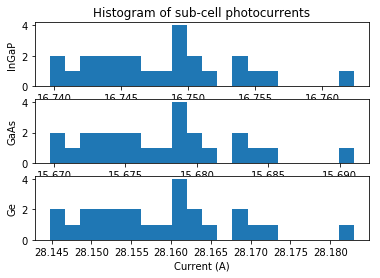

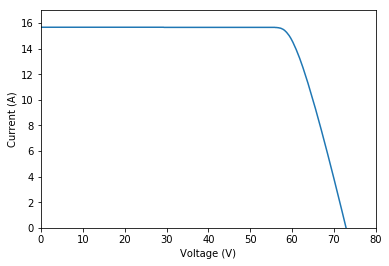

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from solcore.solar_cell import SolarCell
from solcore.light_source import LightSource
from solcore.spice.pv_module_solver import solve_pv_module
from solcore.structure import Junction

T = 298

# First we define the properties of the MJ solar cell that the solar module is made of. We use junctions of kind 2-diode
db_junction = Junction(kind='2D', T=T, reff=1, jref=300, Eg=0.66, A=1, R_series=0.00236, R_shunt=1e14, n=3.5)
db_junction2 = Junction(kind='2D', T=T, reff=1, jref=300, Eg=1.4, A=1, R_series=0.00012, R_shunt=1e14, n=3.5)
db_junction3 = Junction(kind='2D', T=T, reff=1, jref=300, Eg=1.9, A=1, R_series=8.0e-5, R_shunt=1e14, n=3.5)

my_solar_cell = SolarCell([db_junction3, db_junction2, db_junction], T=T, R_series=0.0, area=0.1)

wl = np.linspace(350, 2000, 301) * 1e-9
light_source = LightSource(source_type='standard', version='AM1.5g', x=wl, output_units='photon_flux_per_m',
                           concentration=1)

options = {'light_iv': True, 'wavelength': wl, 'light_source': light_source}

# After defining the individual solar cell, we solve the module IV characteristics adding some dispersion in the
# values of the short circuit currents.
voltage, current, all_Isc_values, raw_data = solve_pv_module(my_solar_cell, options, jscSigma=0.02)

plt.figure(1)

plt.subplot(311)
plt.title('Histogram of sub-cell photocurrents')
plt.ylabel('InGaP')
plt.hist(([row[0] for row in all_Isc_values]), bins=20)

plt.subplot(312)
plt.hist(([row[1] for row in all_Isc_values]), bins=20)
plt.ylabel('GaAs')

plt.subplot(313)
plt.xlabel('Current (A)')
plt.ylabel('Ge')
plt.hist(([row[2] for row in all_Isc_values]), bins=20)

plt.figure(2)
plt.plot(voltage, current)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.xlim(0, 80)
plt.ylim(0, 17)

plt.show()